# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime

from sklearn.linear_model import LinearRegression

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

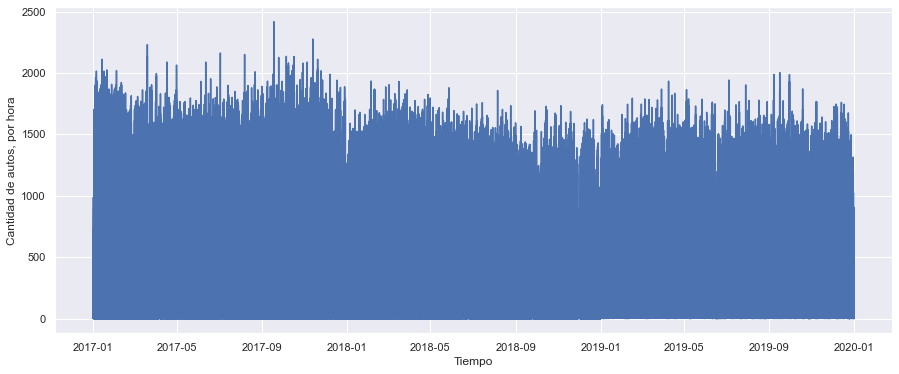

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

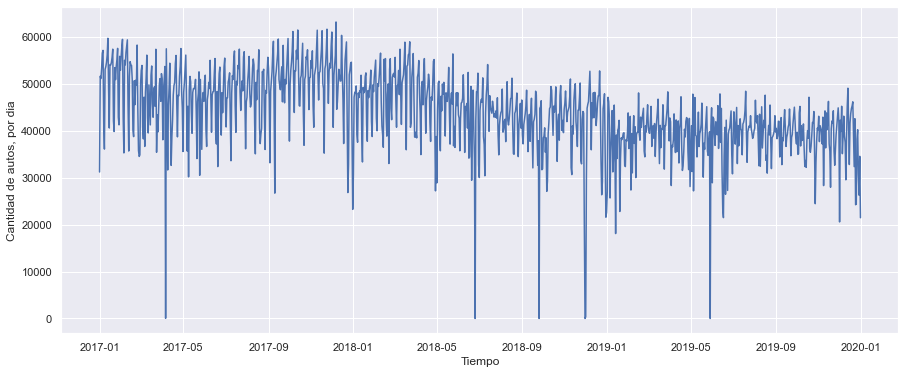

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## Parte A

El principal objetivo de este proyecto esta en predecir el flujo vehicular de los proximos 90 dias del año 2020, en la autopista Illia pagado en efectivo. Para esto vamos a realizar un EDA que nos pueda responder las siguientes preguntas para asi lograr entender el Dataset y continuar con los modelos de prediccion a futuro. 

Preguntas a desarrollar a lo largo de la exploracion de datos: 

1- ¿Cual es el dia mas transcurrido de la semana en promedio de estos 3 años?¿y el mes?¿hay hora pico? 

2- ¿Podremos predecir el flujo segun la direccion en la misma serie de tiempo? 

3- ¿Hay estacionalidad, o alguna tendencia en esta serie? 

##### ¿Como haremos el analisis? 

Para poder responder las preguntas planteadas anteriormente en este analisis exploratorio, vamos a:

- Dividir el dataset por dia y sacar un promedio de los tres años por cada dia.
- Dividir el dataset entre los tipos de vehiculo, analizar breve cada uno, entrar en los sentidos del flujo vehicular. 
- Elaborar graficos que permitan la identificacion de tendencias y patrones a lo largo de la serie.

Este EDA nos permitira responder la primer pregunta planteada, las otras dos seran resueltas a lo largo del notebook. 

In [17]:
#continuamos con el dataset recomendado 
#Agrupamos el dataset por dias segun el tipo de vehiculo y sumando la cantidad de pasos
days = dataset.groupby(["dia", "tipo_vehiculo"]).cantidad_pasos.sum().reset_index().sort_values('cantidad_pasos')
days

dia tipo_vehiculo  cantidad_pasos
1     Domingo        Pesado          118524
11     Sábado        Pesado          171405
5       Lunes        Pesado          221283
7      Martes        Pesado          239471
9   Miércoles        Pesado          255271
3      Jueves        Pesado          255759
13    Viernes        Pesado          265339
0     Domingo       Liviano         5673437
10     Sábado       Liviano         6270310
4       Lunes       Liviano         6470104
6      Martes       Liviano         6626080
8   Miércoles       Liviano         6870255
2      Jueves       Liviano         7046410
12    Viernes       Liviano         7381933

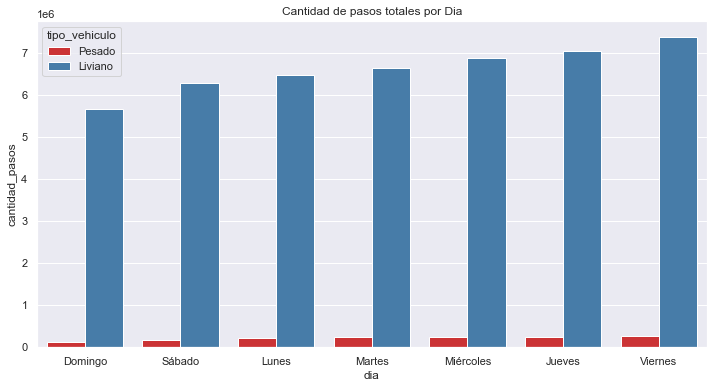

In [18]:
# Graficamos para una mejor comprension 

plt.figure(figsize = (12,6))
plt.title('Cantidad de pasos totales por Dia')
sns.barplot( data = days, x = "dia", y= 'cantidad_pasos', hue = "tipo_vehiculo", palette = "Set1")

plt.show()

In [19]:
#Anualizamos el dataset agregando la columna año
anual = dataset.copy()
anual['año'] = anual['fecha'].dt.year

#Agrupamos
años = anual.groupby(['año', "dia", "tipo_vehiculo"]).cantidad_pasos.sum().reset_index().sort_values('cantidad_pasos')
años

año        dia tipo_vehiculo  cantidad_pasos
29  2019    Domingo        Pesado           29234
39  2019     Sábado        Pesado           37296
15  2018    Domingo        Pesado           38295
33  2019      Lunes        Pesado           46571
35  2019     Martes        Pesado           49595
37  2019  Miércoles        Pesado           50248
1   2017    Domingo        Pesado           50995
41  2019    Viernes        Pesado           51700
31  2019     Jueves        Pesado           51878
25  2018     Sábado        Pesado           58343
19  2018      Lunes        Pesado           73151
11  2017     Sábado        Pesado           75766
21  2018     Martes        Pesado           82604
23  2018  Miércoles        Pesado           89038
17  2018     Jueves        Pesado           89692
27  2018    Viernes        Pesado           93697
5   2017      Lunes        Pesado          101561
7   2017     Martes        Pesado          107272
3   2017     Jueves        Pesado          114189
9   2017  Miércoles        Pesado          115985
13  2017    Viernes        Pesado          119942
28  2019    Domingo       Liviano         1800827
14  2018    Domingo       Liviano         1856088
32  2019      Lunes       Liviano         1919204
38  2019     Sábado       Liviano         1920209
36  2019  Miércoles       Liviano         1972242
34  2019     Martes       Liviano         1981230
0   2017    Domingo       Liviano         2016522
24  2018     Sábado       Liviano         2053845
30  2019     Jueves       Liviano         2061423
40  2019    Viernes       Liviano         2143468
18  2018      Lunes       Liviano         2161165
20  2018     Martes       Liviano         2212853
10  2017     Sábado       Liviano         2296256
22  2018  Miércoles       Liviano         2310801
16  2018     Jueves       Liviano         2374030
4   2017      Lunes       Liviano         2389735
6   2017     Martes       Liviano         2431997
26  2018    Viernes       Liviano         2473342
8   2017  Miércoles       Liviano         2587212
2   2017     Jueves       Liviano         2610957
12  2017    Viernes       Liviano         2765123

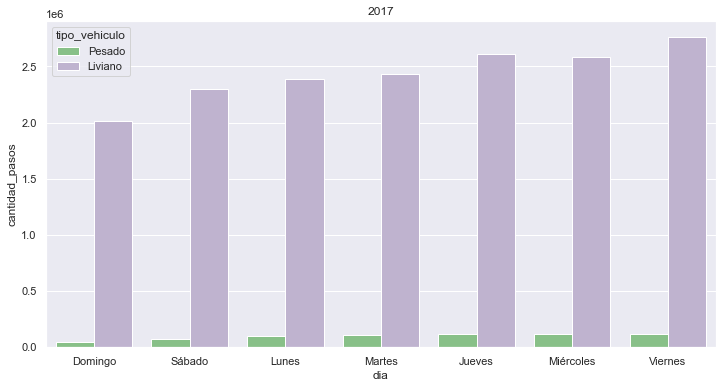

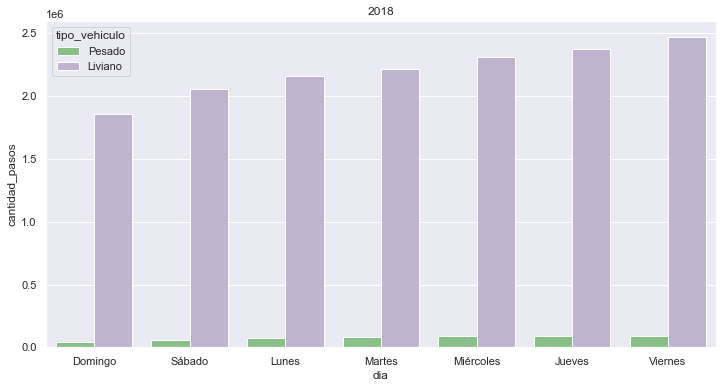

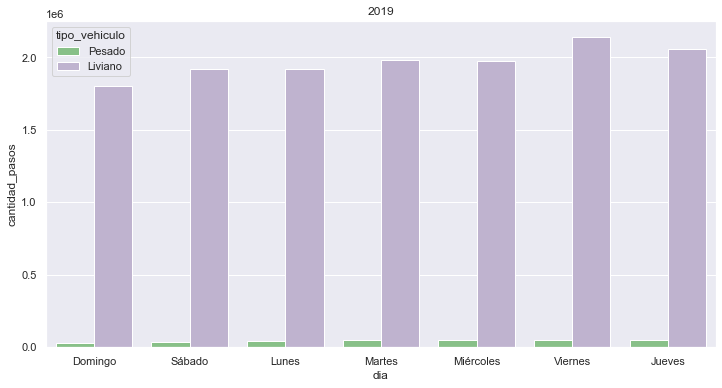

In [20]:
#Graficamos Por Año 
for i in anual.año.unique():
    
    #Iteramos por año
    anualizado = años[años.año == i]
    
    #graficamos
    plt.figure(figsize = (12,6))
    plt.title(str(i))
    sns.barplot( data = anualizado, x = "dia", y= 'cantidad_pasos', hue = "tipo_vehiculo", palette = "Accent")
    plt.show()

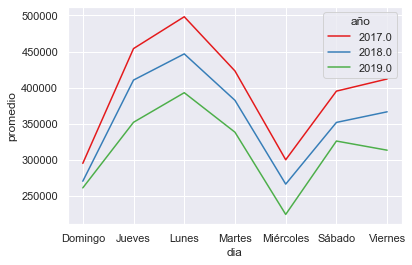

In [21]:
#Sacamos el promedio de pasos por dia
promedios = pd.DataFrame({'año' : [],'dia' : [], 'promedio':[]})

for j in anual.año.unique():
    for i in anual.dia.unique():
        locals()[i] = anual[(anual.dia == i) & (anual.año == j)]
        promedio = locals()[i].cantidad_pasos.sum()/len(i)
        promedios = promedios.append({'año': j, 'dia': str(i), 'promedio': int(promedio)}, ignore_index = True)
        
promedios = promedios.sort_values('dia')

#Graficamos
sns.lineplot(data = promedios ,x = 'dia', y = 'promedio', hue = 'año', palette = 'Set1')
plt.show()


In [22]:
#Agrupamos por sentidos
sentidos = anual.groupby(['año', "dia", "sentido"]).cantidad_pasos.sum().reset_index().sort_values('dia')
sentidos

año        dia    sentido  cantidad_pasos
0   2017    Domingo     Centro         1075772
1   2017    Domingo  Provincia          991745
15  2018    Domingo  Provincia          925608
14  2018    Domingo     Centro          968775
28  2019    Domingo     Centro          933847
29  2019    Domingo  Provincia          896214
17  2018     Jueves  Provincia         1217934
16  2018     Jueves     Centro         1245788
30  2019     Jueves     Centro         1086413
31  2019     Jueves  Provincia         1026888
3   2017     Jueves  Provincia         1300490
2   2017     Jueves     Centro         1424656
19  2018      Lunes  Provincia         1097317
33  2019      Lunes  Provincia          956770
5   2017      Lunes  Provincia         1177681
4   2017      Lunes     Centro         1313615
18  2018      Lunes     Centro         1136999
32  2019      Lunes     Centro         1009005
34  2019     Martes     Centro         1039723
35  2019     Martes  Provincia          991102
21  2018     Martes  Provincia         1128254
20  2018     Martes     Centro         1167203
6   2017     Martes     Centro         1339786
7   2017     Martes  Provincia         1199483
22  2018  Miércoles     Centro         1223054
23  2018  Miércoles  Provincia         1176785
37  2019  Miércoles  Provincia          983673
36  2019  Miércoles     Centro         1038817
8   2017  Miércoles     Centro         1432727
9   2017  Miércoles  Provincia         1270470
39  2019     Sábado  Provincia          949099
38  2019     Sábado     Centro         1008406
10  2017     Sábado     Centro         1219135
11  2017     Sábado  Provincia         1152887
25  2018     Sábado  Provincia         1043809
24  2018     Sábado     Centro         1068379
12  2017    Viernes     Centro         1525983
13  2017    Viernes  Provincia         1359082
27  2018    Viernes  Provincia         1253208
26  2018    Viernes     Centro         1313831
40  2019    Viernes     Centro         1135452
41  2019    Viernes  Provincia         1059716

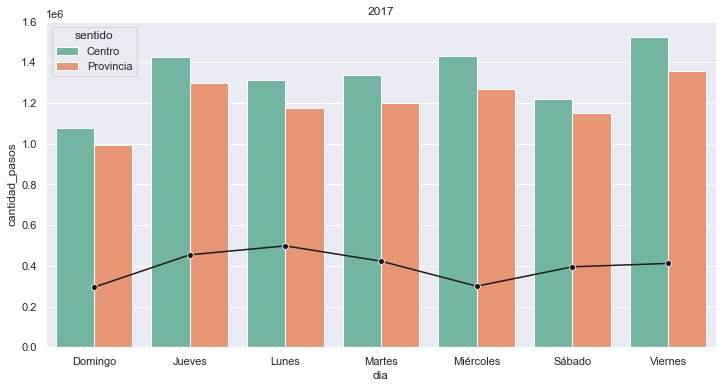

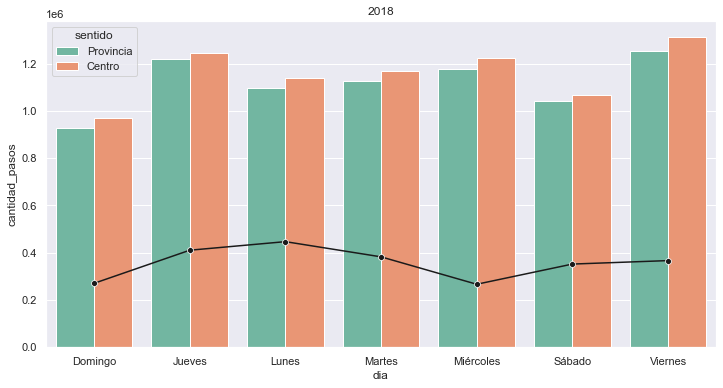

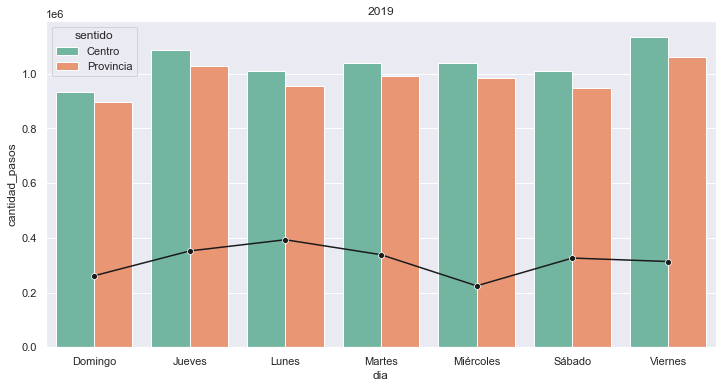

In [23]:

#Graficamos Por Año 
for i in anual.año.unique():
    
    
    
    #Iteramos por año
    anualizado = sentidos[sentidos.año == i]
    promedios_anual = promedios[promedios.año == i]
    
    #graficamos
    plt.figure(figsize = (12,6))
    plt.title(str(i))
    
    sns.lineplot(data = promedios_anual, x='dia', y = 'promedio', marker = 'o', color = 'k', legend = 'brief')
    plt.legend(['Promedio'])
    
    sns.barplot( data = anualizado, x = "dia", y= 'cantidad_pasos', hue = "sentido", palette = "Set2")
    
    
    
    plt.show()
    

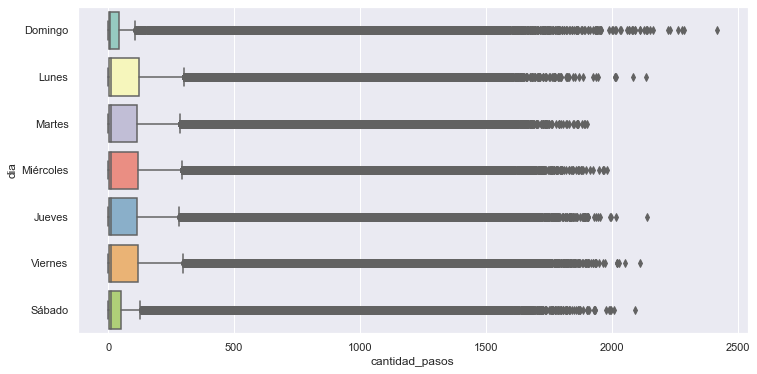

In [24]:
#Bloxplot para conocer si encontramos outlier segun los dias
plt.figure(figsize = (12,6))
sns.boxplot(data=dataset, x = 'cantidad_pasos',y ='dia', palette= "Set3")
plt.show()

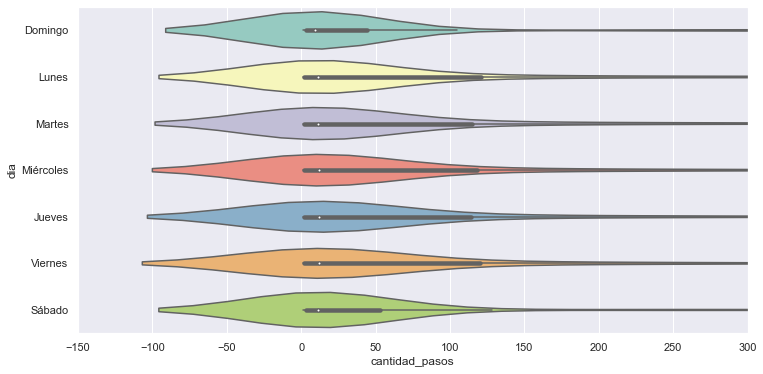

In [25]:
plt.figure(figsize = (12,6))
sns.violinplot(data=dataset, x = 'cantidad_pasos',y ='dia', palette= "Set3")
plt.xlim(-150,300)
plt.show()

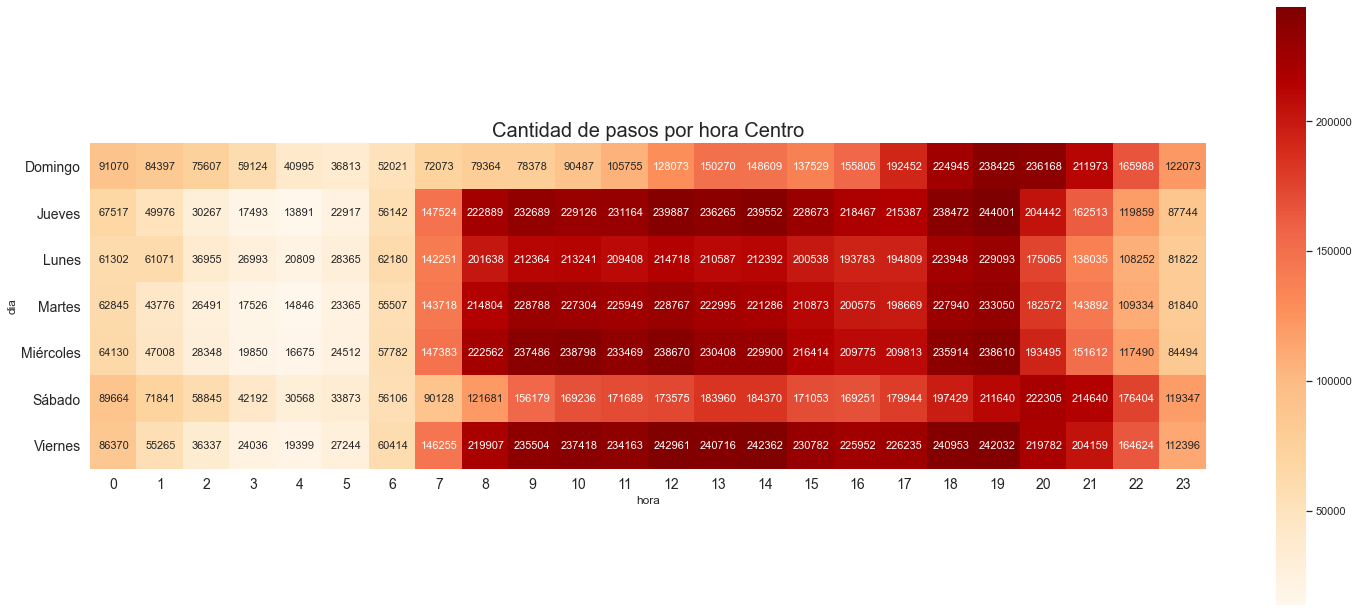

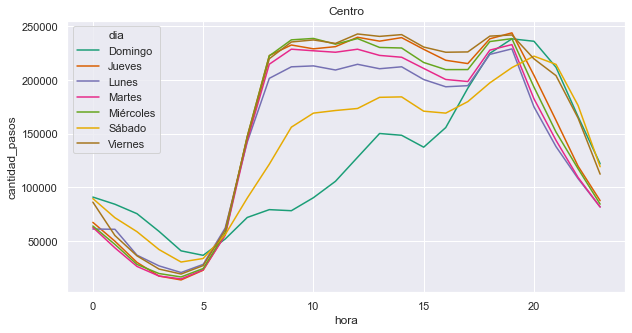

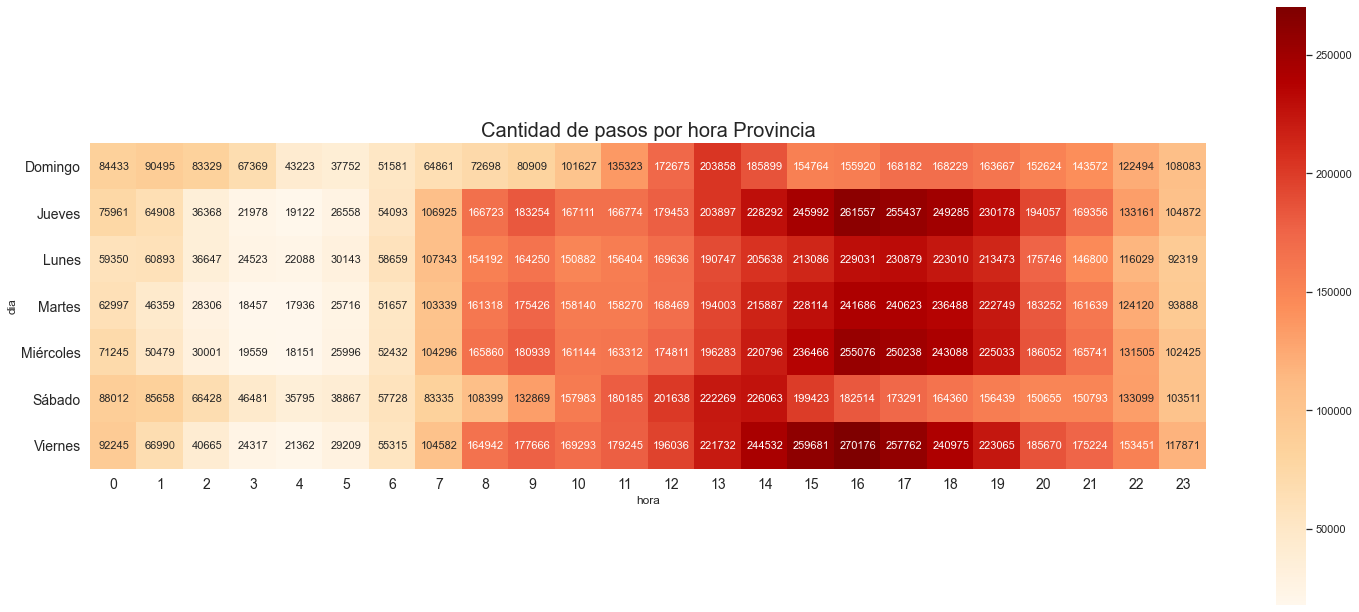

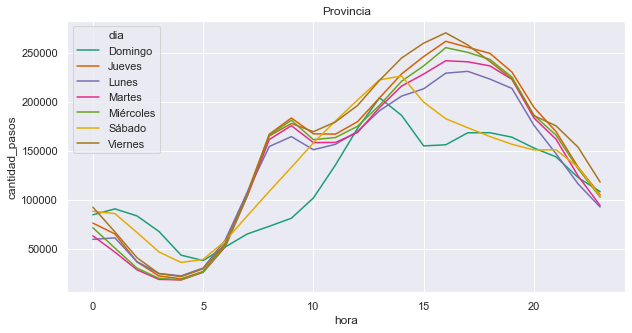

In [26]:
#Copiamos dataset agragando la columna hora
sentidos = dataset.copy()
sentidos['hora'] = sentidos['fecha'].dt.hour

agrupado = sentidos.groupby(['dia', 'hora', 'sentido']).cantidad_pasos.sum().reset_index().sort_values('dia')

#hacemos un heat map por hora para cada sentido 
for i in agrupado.sentido.unique():
    
    #hacemos un pivot-table de la cantidad de pasos por hora para cada sentido 
    horario_sentido = agrupado[agrupado.sentido == i]
    horario = horario_sentido.pivot_table(values = 'cantidad_pasos', index = 'dia', columns = 'hora')
    
    #Graficamos 
    plt.figure(figsize = (25,11))
    sns.heatmap(horario,
               cbar = True,
               square = True, 
               annot =True,
               fmt = '.0f',
               annot_kws = {'size':11},
               cmap="OrRd")
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.title('Cantidad de pasos por hora '+ i, fontsize = 20)
    
    plt.figure(figsize = (10,5))
    plt.title(i)
    sns.lineplot( x = horario_sentido.hora, y = horario_sentido.cantidad_pasos, hue = horario_sentido.dia, palette = 'Dark2')
    plt.show()

In [27]:
sentidos['año'], sentidos['mes'] = sentidos.fecha.dt.year, sentidos.fecha.dt.month

pasos_mes = sentidos.groupby(['año', "mes", 'sentido']).cantidad_pasos.sum().reset_index().sort_values('mes')
pasos_mes.head()

año  mes    sentido  cantidad_pasos
0   2017    1     Centro          843430
1   2017    1  Provincia          721830
25  2018    1  Provincia          703836
24  2018    1     Centro          717831
48  2019    1     Centro          585248

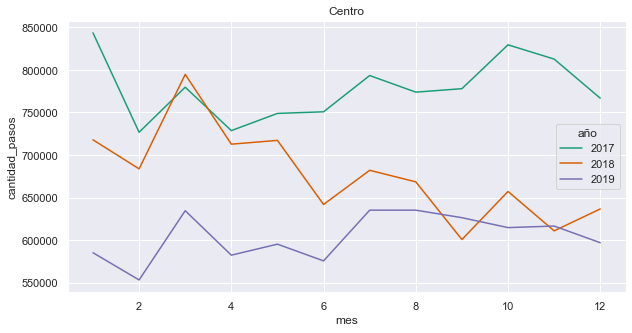

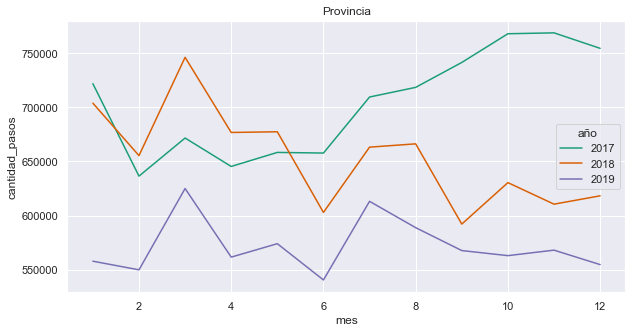

In [28]:
for i in pasos_mes.sentido.unique():
    sentido_mes = pasos_mes[pasos_mes.sentido == i]
    
    plt.figure(figsize = (10,5))
    plt.title(i)
    sns.lineplot( x = sentido_mes.mes, y = sentido_mes.cantidad_pasos, hue = sentido_mes.año, palette = 'Dark2')
    plt.show()
    

### Parte A conclusion
Para finalizar con esta parte del proyecto, y respondiendo a las preguntas anteriormente planteadas, llegamos a la conclusion de que el dia mas transcurrido de la semana es el viernes, en la suma total, sin embargo el promedio mas alto lo tiene el lunes en ambos sentidos. Los flujos por sentidos son bastante similares en cuanto  a lo diario, en lo que es el horario tenemos algunas diferencias principalmente en sentido a Centro, ya que el flujo crece de manera exponencial entre las 5 y las 9 y se mantiene alto (235 mil pasos aporx.) hasta las 19hs, mientras que en sentido a provincia se mantiene creciente casi de manera lineal hasta las 19hs. El horario pico en sentido centro es a las 19hs y en sentido provincia es a las 16hs. 

En cuanto a los meses podemos encontrar grandes diferencias en los flujos segun el año, notamos una tendencia decreciente entre los años, siendo el 2018 una transicion que no presigue ningun patron y cruza ambas lineas tanto por encima del 2017 (sentido provicia) como por debajo, y tanto 2017 como 2019 siguen patrones similares pero con valores mas bajos en el 2019. El mes con mayor flujo es marzo, aunque en el 2017 enero fue el mas transcurrido, y sentido provincia el flujo aumento en todos los meses despues de abril. 

## PARTE B 

Para esta parte del proyecto, y prioncipalmente responder a la pregunta numero dos planteada en la parte anterior, vamos a resolverla haciendo una prediccion para cada sentido, empezando por Provincia y luego para Centro. Los analisis y los desarrollos de cada uno de los modelos van a ser similares. 

### Provincia

In [29]:
provincia = dataset[dataset.sentido == 'Provincia']
provincia['año'] , provincia['mes'] , provincia['dia'] ,provincia['hora'] = provincia['fecha'].dt.year, provincia['fecha'].dt.month, provincia['fecha'].dt.day , provincia['fecha'].dt.hour
provincia

<ipython-input-29-5650de804fe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincia['año'] , provincia['mes'] , provincia['dia'] ,provincia['hora'] = provincia['fecha'].dt.year, provincia['fecha'].dt.month, provincia['fecha'].dt.day , provincia['fecha'].dt.hour


dia    sentido tipo_vehiculo  cantidad_pasos               fecha  \
0         1  Provincia        Pesado               1 2017-01-01 00:00:00   
1         1  Provincia       Liviano               9 2017-01-01 00:00:00   
2         1  Provincia       Liviano             644 2017-01-01 00:00:00   
3         1  Provincia        Pesado               6 2017-01-01 00:00:00   
4         1  Provincia        Pesado               1 2017-01-01 00:00:00   
...     ...        ...           ...             ...                 ...   
238860   31  Provincia        Pesado               2 2019-12-31 21:00:00   
238861   31  Provincia       Liviano             905 2019-12-31 21:00:00   
238864   31  Provincia       Liviano             556 2019-12-31 22:00:00   
238865   31  Provincia        Pesado               1 2019-12-31 22:00:00   
238868   31  Provincia       Liviano             190 2019-12-31 23:00:00   

         año  mes  hora  
0       2017    1     0  
1       2017    1     0  
2       2017    1     0  
3       2017    1     0  
4       2017    1     0  
...      ...  ...   ...  
238860  2019   12    21  
238861  2019   12    21  
238864  2019   12    22  
238865  2019   12    22  
238868  2019   12    23  

[111173 rows x 8 columns]

In [30]:
re_provincia = provincia.resample('D', on = 'fecha').sum()#.reset_index()
re_provincia

dia  cantidad_pasos     año  mes  hora
fecha                                              
2017-01-01   104           14132  209768  104  1356
2017-01-02   258           23743  260193  129  1497
2017-01-03   384           23526  258176  128  1491
2017-01-04   520           24383  262210  130  1601
2017-01-05   620           25666  250108  124  1516
...          ...             ...     ...  ...   ...
2019-12-27  1296           18995   96912  576   552
2019-12-28  1344           14686   96912  576   552
2019-12-29  1392           12544   96912  576   552
2019-12-30  1410           15924   94893  564   549
2019-12-31  1395           10472   90855  540   529

[1095 rows x 5 columns]

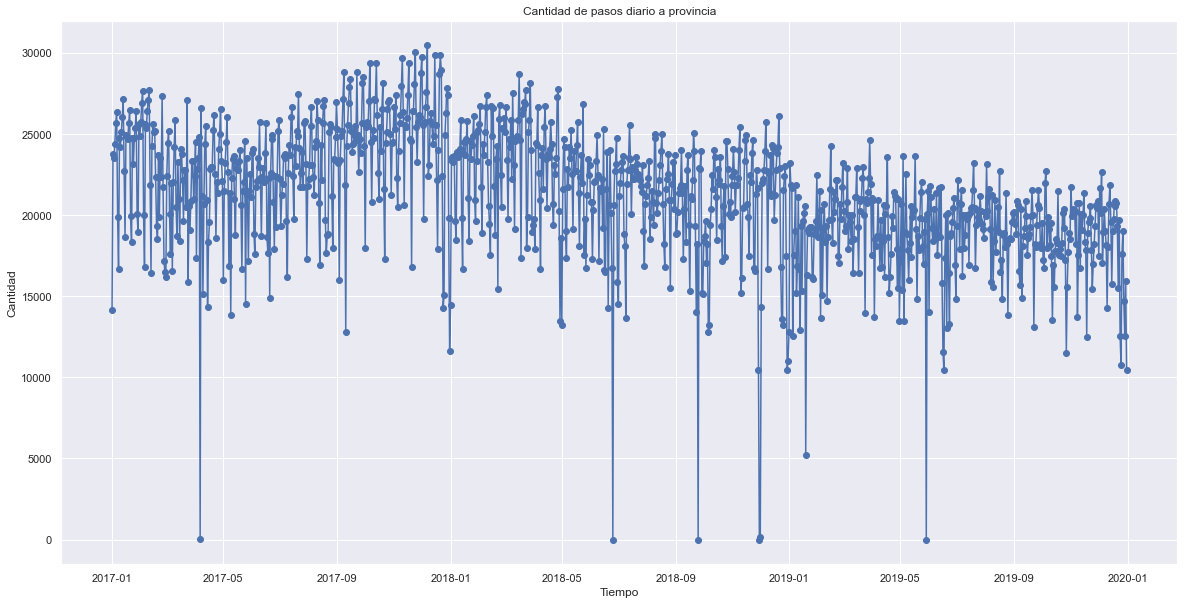

In [31]:
plt.figure(figsize = (20,10))
plt.plot(re_provincia.index, re_provincia.cantidad_pasos, 'o-')

plt.title('Cantidad de pasos diario a provincia')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.show()

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


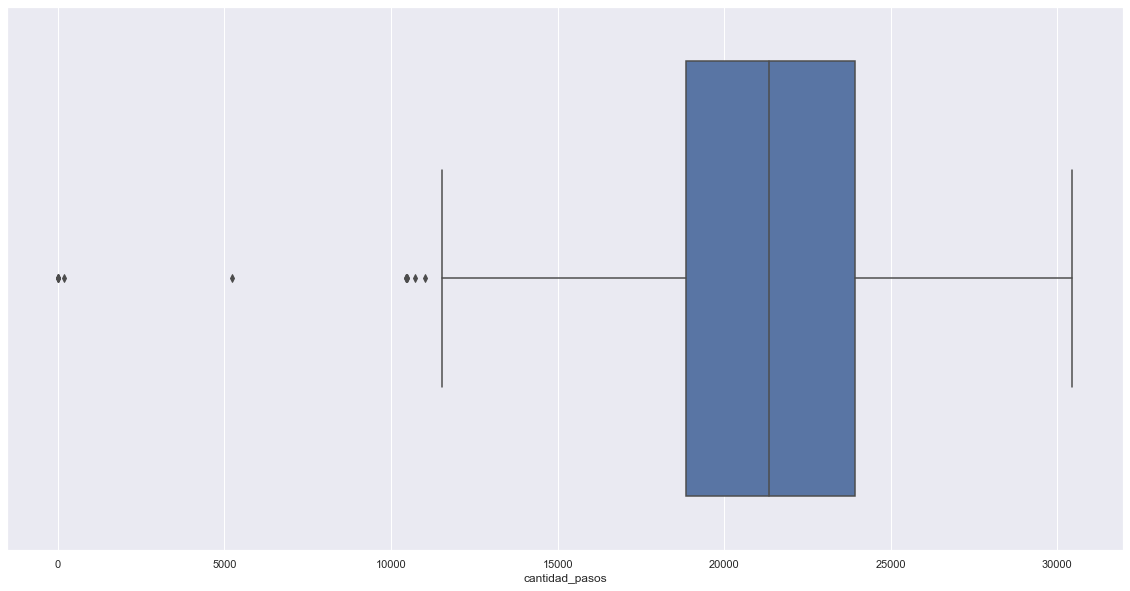

In [32]:
plt.figure(figsize = (20,10))
sns.boxplot(re_provincia.cantidad_pasos)
plt.show()

In [33]:
## Determinamos el valor del rango intercuartilico ## 
    
Q1 = re_provincia.cantidad_pasos.quantile(0.25)
Q3 = re_provincia.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1

re_provincia[(re_provincia.cantidad_pasos < (Q1 - 1.5*IQR)) | (re_provincia.cantidad_pasos > (Q3 + 1.5*IQR))] = np.nan
re_provincia = re_provincia.interpolate()

#re_provincia = re_provincia[(re_provincia.cantidad_pasos >= (Q1 - 1.5*IQR)) | (re_provincia.cantidad_pasos >= (Q3 + 1.5*IQR)) ]

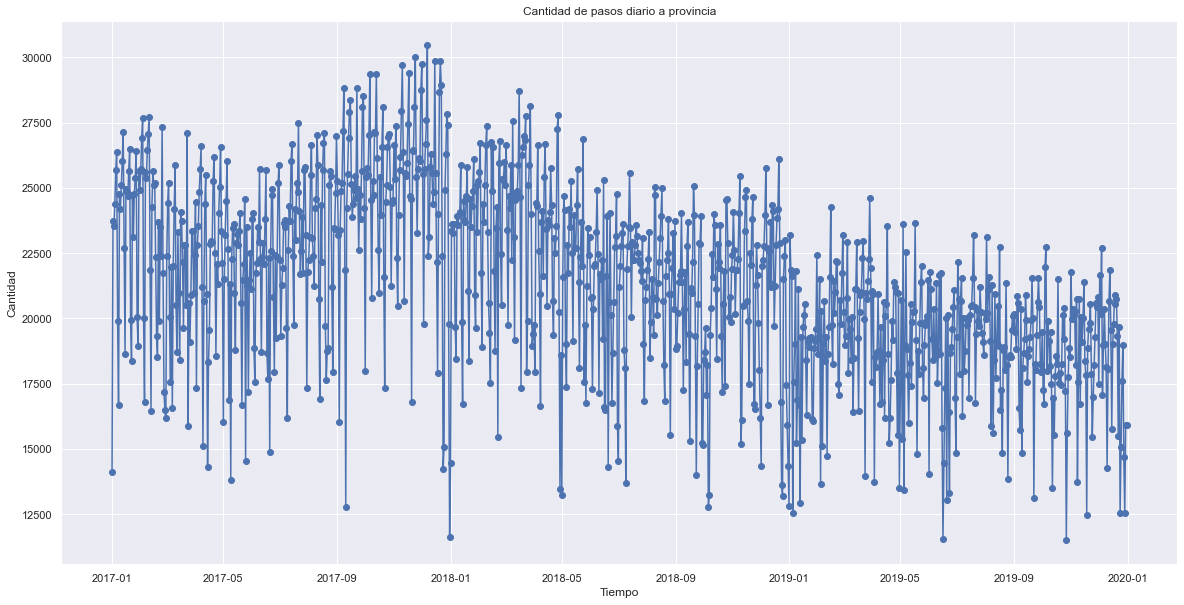

In [34]:
plt.figure(figsize = (20,10))
plt.plot(re_provincia.index, re_provincia.cantidad_pasos, 'o-')

plt.title('Cantidad de pasos diario a provincia')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.show()

In [35]:
ventana = int(365*2/7)
promedio_sem_prov = re_provincia.cantidad_pasos.rolling(window=ventana, center = True).mean()
#promedio_sem_prov.index = re_provincia.fecha
promedio_sem_prov


fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

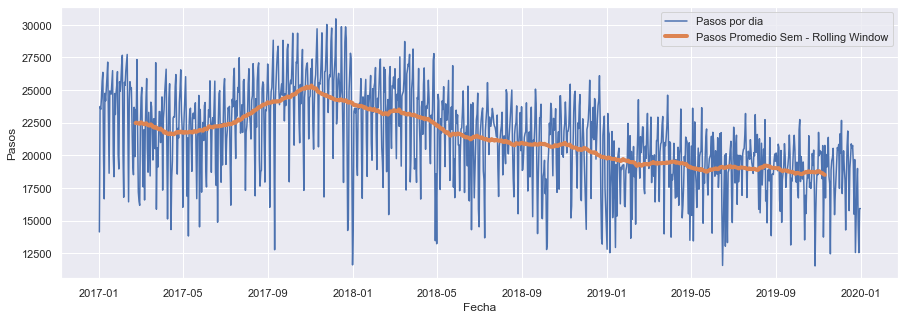

In [36]:
plt.figure(figsize = (15,5))
plt.plot(re_provincia.index, re_provincia.cantidad_pasos, label = 'Pasos por dia')
plt.plot(re_provincia.index, promedio_sem_prov, lw = 4, label = 'Pasos Promedio Sem - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.legend()
plt.show()

### BENCHMARK Regresion Lineal

In [37]:
re_provincia['fecha_numeros']=re_provincia.index.map(datetime.datetime.toordinal)
re_provincia.head()

dia  cantidad_pasos       año    mes    hora  fecha_numeros
fecha                                                                    
2017-01-01  104.0         14132.0  209768.0  104.0  1356.0         736330
2017-01-02  258.0         23743.0  260193.0  129.0  1497.0         736331
2017-01-03  384.0         23526.0  258176.0  128.0  1491.0         736332
2017-01-04  520.0         24383.0  262210.0  130.0  1601.0         736333
2017-01-05  620.0         25666.0  250108.0  124.0  1516.0         736334

In [38]:
lr = LinearRegression()
lr.fit(re_provincia.fecha_numeros.values.reshape(-1,1), re_provincia.cantidad_pasos)

LinearRegression()

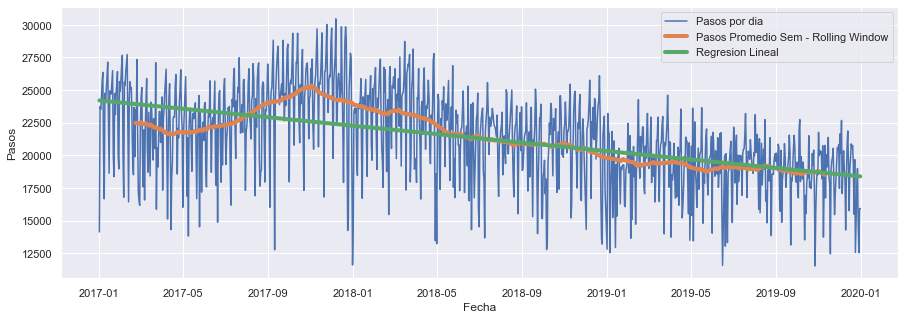

In [39]:
plt.figure(figsize = (15,5))
plt.plot(re_provincia.index, re_provincia.cantidad_pasos, label = 'Pasos por dia')
plt.plot(re_provincia.index, promedio_sem_prov, lw = 4, label = 'Pasos Promedio Sem - Rolling Window')
plt.plot(re_provincia.index, lr.predict(re_provincia.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Regresion Lineal')

plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.legend()
plt.show()

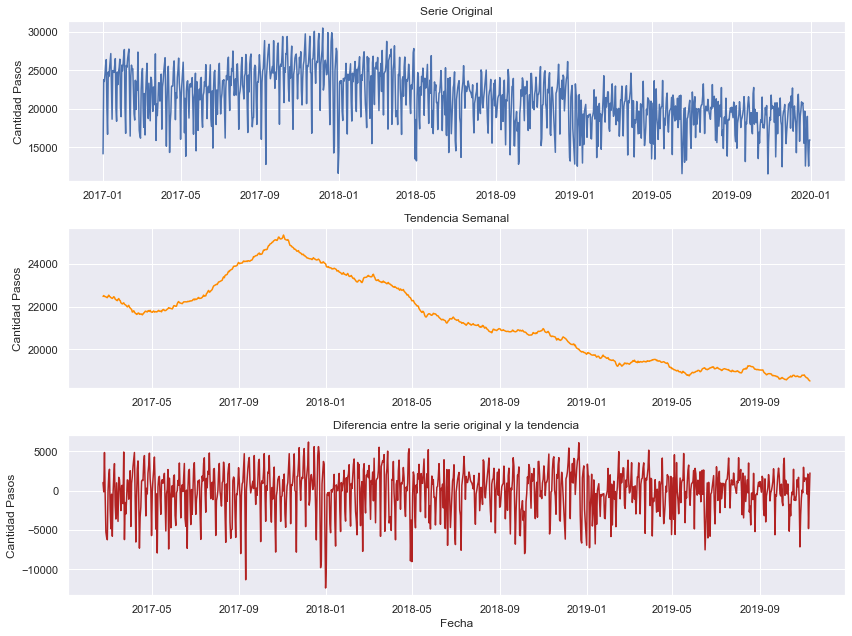

In [40]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(re_provincia.index, re_provincia.cantidad_pasos)
plt.ylabel('Cantidad Pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Semanal')
plt.plot(re_provincia.index, promedio_sem_prov, color = 'darkorange')
plt.ylabel('Cantidad Pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(re_provincia.index, re_provincia.cantidad_pasos - promedio_sem_prov, color = 'firebrick')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Pasos')

plt.tight_layout()
plt.show()

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultados_provincia = seasonal_decompose(re_provincia.cantidad_pasos, model='additive', extrapolate_trend='freq')

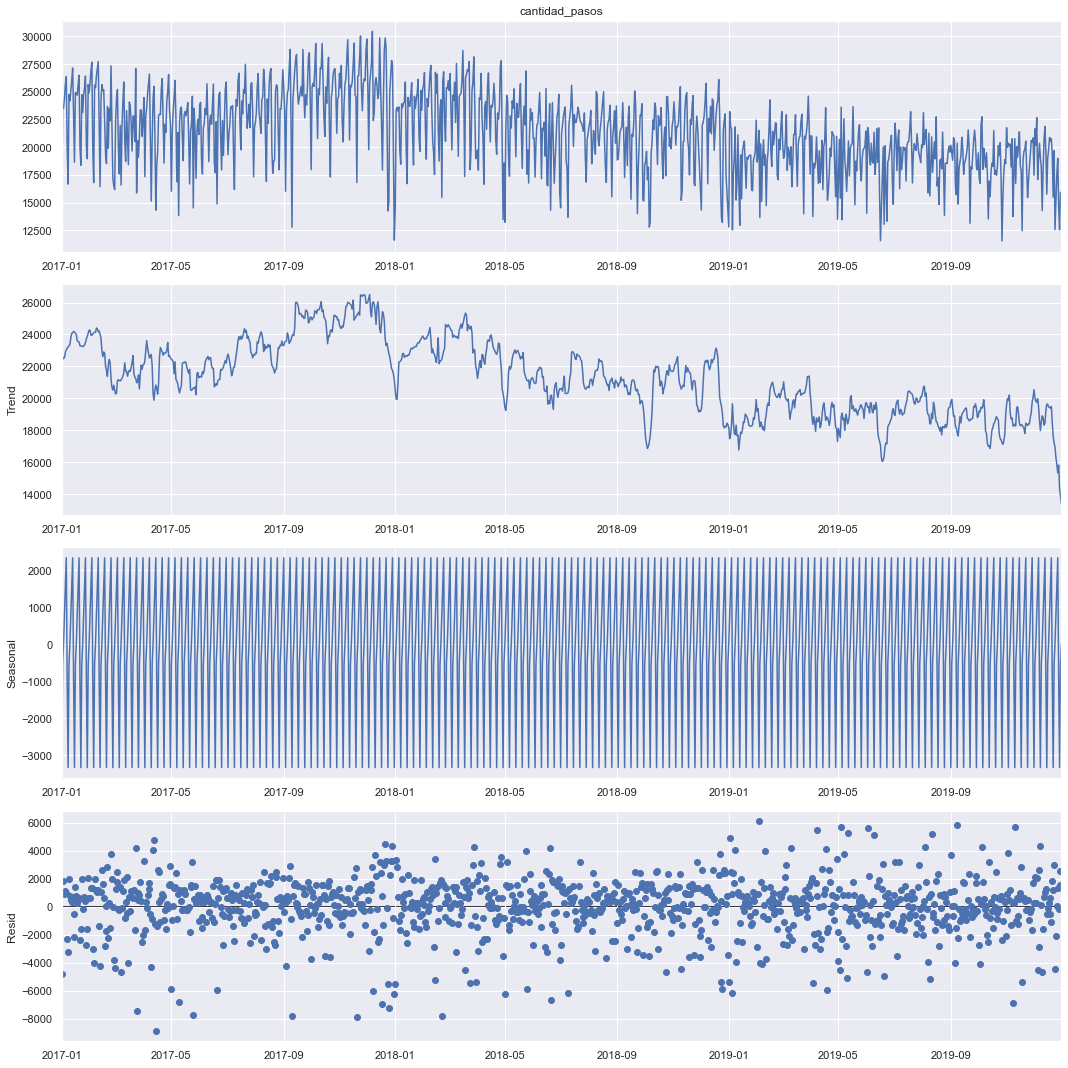

In [42]:
plt.rcParams['figure.figsize'] = [15,15]
resultados_provincia.plot()
plt.show()

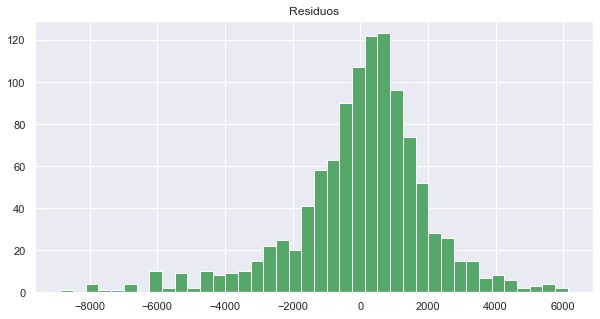

In [43]:
plt.figure(figsize = (10,5))
plt.hist(resultados_provincia.resid, bins = 40, color = 'g')
plt.title('Residuos')
plt.show()

### Autocorrelacion

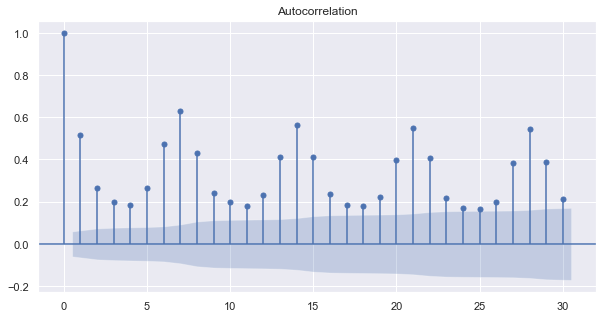

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['figure.figsize'] = [10,5]
plot_acf(re_provincia.cantidad_pasos, lags = 30)
plt.show()

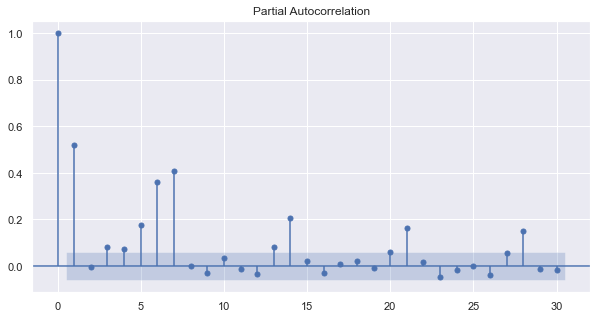

In [45]:
plot_pacf(re_provincia.cantidad_pasos, lags = 30)
plt.show()

### ONE-STEP Prediction

In [46]:
senial_prov = re_provincia.cantidad_pasos
print(re_provincia.shape, senial_prov.shape)
senial_prov.head()

(1095, 6) (1095,)


fecha
2017-01-01    14132.0
2017-01-02    23743.0
2017-01-03    23526.0
2017-01-04    24383.0
2017-01-05    25666.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [47]:
look_back = 250
N_prov = senial_prov.shape[0]
X_prov = np.zeros((N_prov - look_back - 1,look_back))
y_prov = np.zeros(N_prov - look_back - 1)
print(X_prov.shape, y_prov.shape)

(844, 250) (844,)


In [48]:
for i in range(X_prov.shape[0]):
    X_prov[i,:] = senial_prov.iloc[i:i+look_back]
    y_prov[i] = senial_prov.iloc[i+look_back]

In [49]:
N_train_prov = 750 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test_prov = 90 #cantidad de puntos que vamos a usar para evaluar
length_total_prov = N_train_prov + N_test_prov + look_back

X_train_prov = X_prov[:N_train_prov,:]
y_train_prov = y_prov[:N_train_prov]
print('Instancias de entrenamiento: ', X_train_prov.shape, y_train_prov.shape)

X_test_prov = X_prov[N_train_prov:N_train_prov+N_test_prov,:]
y_test_prov = y_prov[N_train_prov:N_train_prov+N_test_prov]
print('Instancias de prueba: ', X_test_prov.shape, y_test_prov.shape)

Instancias de entrenamiento:  (500, 250) (500,)
Instancias de prueba:  (90, 250) (90,)


##### Entrenamos el RandomForest y optimizamos los hiperparametros

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth': [3,9,13,15],
         'n_estimators' : [100, 75, 50],
        'max_features': ['auto', 'sqrt', 'log2']}

rf_prov = RandomizedSearchCV(RandomForestRegressor(), params, random_state=42, cv = 4 ,n_jobs = -1).fit(X_train_prov,y_train_prov)

In [51]:
print("Mejores parametros del modelo random forest: ", rf_prov.best_params_)
print("Mejor Score: ", rf_prov.best_score_.round(3))

Mejores parametros del modelo random forest:  {'n_estimators': 75, 'max_features': 'sqrt', 'max_depth': 15}
Mejor Score:  0.203


#### Predecimos y Testeamos

In [52]:
y_pred_prov = rf_prov.predict(X_prov)
y_train_pred_prov = rf_prov.predict(X_train_prov)
y_test_pred_prov = rf_prov.predict(X_test_prov)

MSE_prov = mean_squared_error(y_test_prov, y_test_pred_prov)
print('Error en Test:',np.sqrt(MSE_prov))

Error en Test: 2337.44748153512


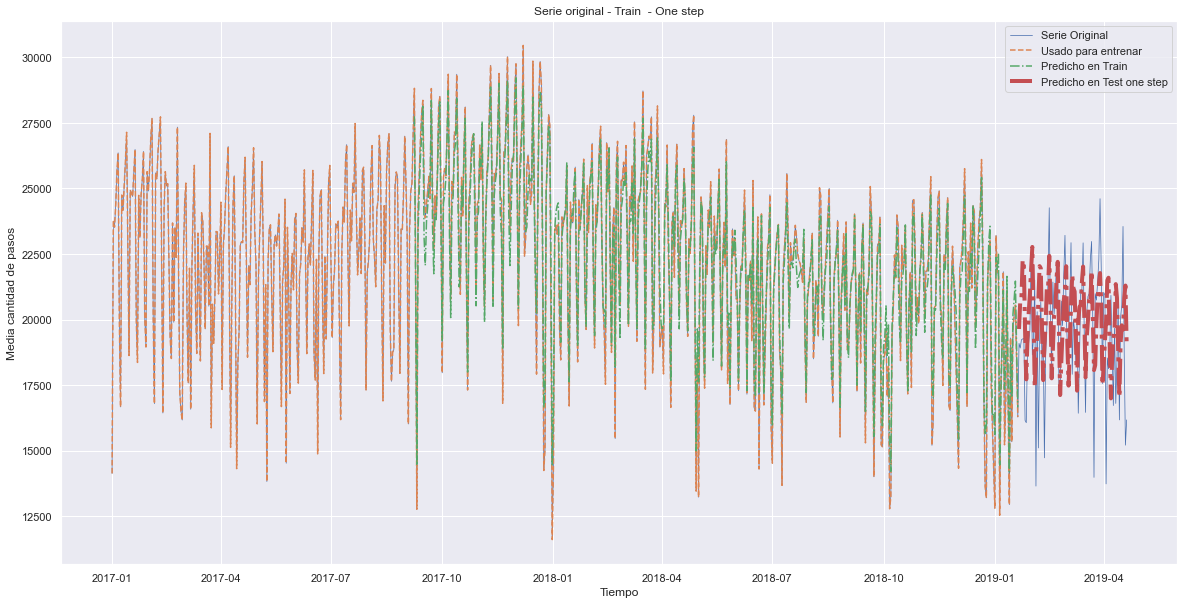

In [53]:
plt.figure(figsize=(20,10))
plt.plot(senial_prov.index[:length_total_prov], senial_prov[:length_total_prov],lw = 0.75, label = 'Serie Original')
plt.plot(senial_prov.index[:N_train_prov + look_back], senial_prov[:N_train_prov + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial_prov.index[look_back: look_back + N_train_prov], y_train_pred_prov,'-.',label = 'Predicho en Train')
plt.plot(senial_prov.index[N_train_prov+look_back: length_total_prov], y_test_pred_prov,'-.', lw = 4, label = 'Predicho en Test one step')
plt.legend()

plt.title('Serie original - Train  - One step')
plt.xlabel('Tiempo')
plt.ylabel('Media cantidad de pasos')
plt.show()

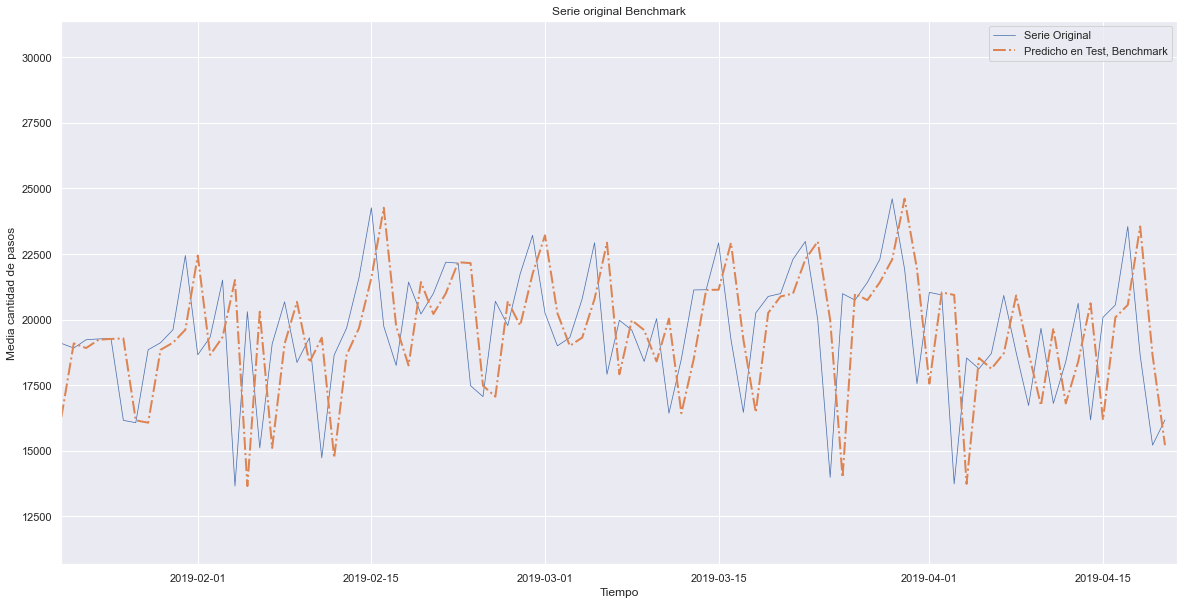

In [54]:
#BENCHMARK DE LA FECHA ANTERIOR
y_test_pred_benchmark_prov = y_prov[-1 + N_train_prov:N_train_prov+N_test_prov - 1]

plt.figure(figsize=(20,10))
plt.plot(senial_prov.index[:length_total_prov], senial_prov[:length_total_prov],lw = 0.75, label = 'Serie Original')
plt.plot(senial_prov.index[N_train_prov+look_back: length_total_prov], y_test_pred_benchmark_prov,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial_prov.index[N_train_prov+look_back], senial_prov.index[length_total_prov])

plt.title('Serie original Benchmark')
plt.xlabel('Tiempo')
plt.ylabel('Media cantidad de pasos')
plt.legend()
plt.show()

### Multi-Step Prediction

In [55]:
X_test_prov[0,:]
y_ms_test_pred_prov = []
x = X_test_prov[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test_prov.size):
    y_os_pred_prov = rf_prov.predict(x.reshape(1,-1))
    y_ms_test_pred_prov.append(y_os_pred_prov)
    x = np.append(x[1:], y_os_pred_prov)
y_ms_test_pred_prov = np.array(y_ms_test_pred_prov)

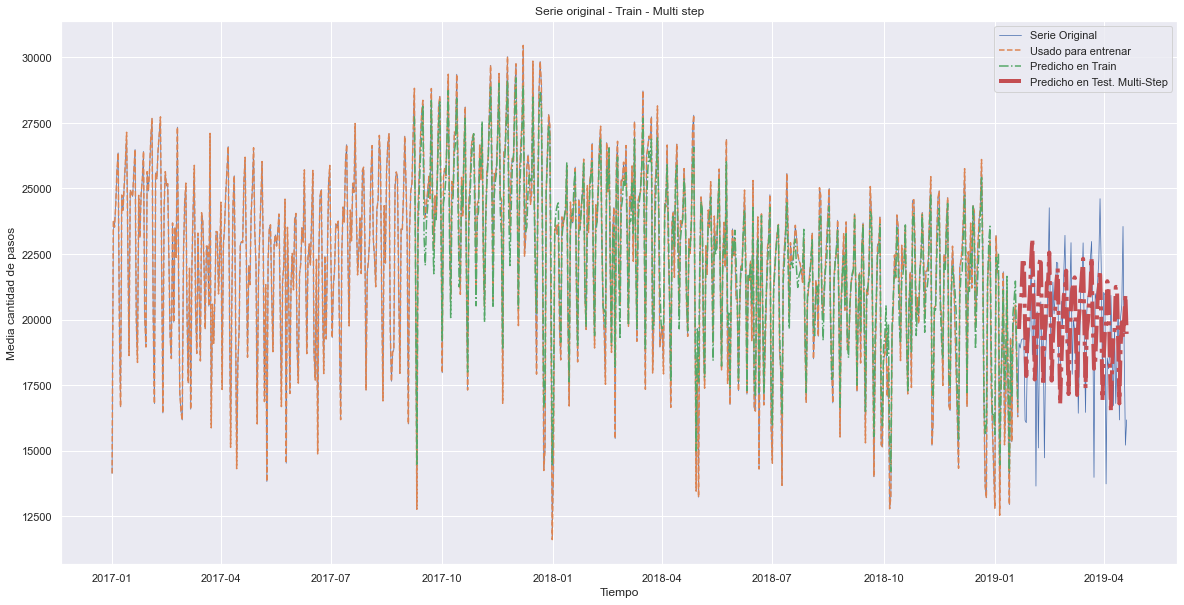

In [56]:

plt.figure(figsize=(20,10))
plt.plot(senial_prov.index[:length_total_prov], senial_prov[:length_total_prov],lw = 0.75, label = 'Serie Original')
plt.plot(senial_prov.index[:N_train_prov + look_back], senial_prov[:N_train_prov + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial_prov.index[look_back: look_back + N_train_prov], y_train_pred_prov,'-.',label = 'Predicho en Train')
plt.plot(senial_prov.index[N_train_prov+look_back: length_total_prov], y_ms_test_pred_prov,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()

plt.title('Serie original - Train - Multi step')
plt.xlabel('Tiempo')
plt.ylabel('Media cantidad de pasos')
plt.show()

In [57]:
MSE_prov_ms = mean_squared_error(y_test_prov, y_ms_test_pred_prov)
print('Error en Test:',np.sqrt(MSE_prov_ms))

Error en Test: 2340.600998193455


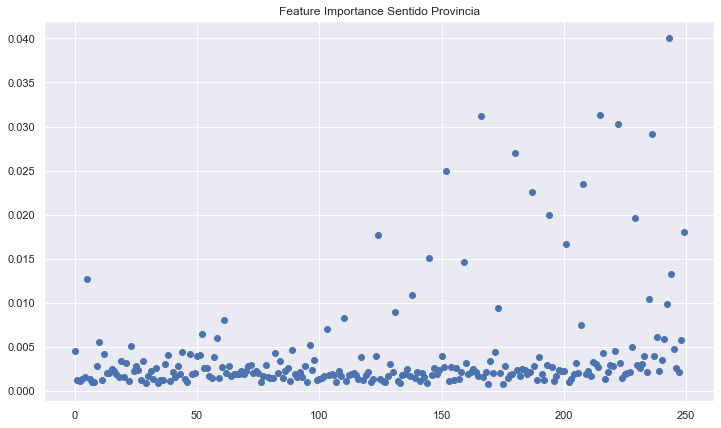

In [58]:
plt.figure(figsize = (12,7))
plt.title('Feature Importance Sentido Provincia')
plt.scatter(np.arange(rf_prov.best_estimator_.feature_importances_.size),rf_prov.best_estimator_.feature_importances_)
plt.show()

## Parte B
### Centro

In [59]:
centro = dataset[dataset.sentido == 'Centro']
centro['año'] , centro['mes'] , centro['dia'] ,centro['hora'] = centro['fecha'].dt.year, centro['fecha'].dt.month, centro['fecha'].dt.day , centro['fecha'].dt.hour
centro

<ipython-input-59-c4088b5a1bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centro['año'] , centro['mes'] , centro['dia'] ,centro['hora'] = centro['fecha'].dt.year, centro['fecha'].dt.month, centro['fecha'].dt.day , centro['fecha'].dt.hour


dia sentido tipo_vehiculo  cantidad_pasos               fecha   año  \
6         1  Centro       Liviano              23 2017-01-01 00:00:00  2017   
7         1  Centro        Pesado               1 2017-01-01 00:00:00  2017   
8         1  Centro        Pesado              21 2017-01-01 00:00:00  2017   
9         1  Centro        Pesado              10 2017-01-01 00:00:00  2017   
10        1  Centro        Pesado               1 2017-01-01 00:00:00  2017   
...     ...     ...           ...             ...                 ...   ...   
238857   31  Centro        Pesado               1 2019-12-31 20:00:00  2019   
238862   31  Centro       Liviano             799 2019-12-31 21:00:00  2019   
238863   31  Centro        Pesado               2 2019-12-31 22:00:00  2019   
238866   31  Centro       Liviano             580 2019-12-31 22:00:00  2019   
238867   31  Centro       Liviano             214 2019-12-31 23:00:00  2019   

        mes  hora  
6         1     0  
7         1     0  
8         1     0  
9         1     0  
10        1     0  
...     ...   ...  
238857   12    20  
238862   12    21  
238863   12    22  
238866   12    22  
238867   12    23  

[127696 rows x 8 columns]

In [60]:
re_centro = centro.resample('D', on = 'fecha').sum()#.reset_index()
re_centro

dia  cantidad_pasos     año  mes  hora
fecha                                              
2017-01-01   127           17051  256159  127  1620
2017-01-02   374           27825  377179  187  2216
2017-01-03   537           27567  361043  179  2082
2017-01-04   764           28949  385247  191  2308
2017-01-05   970           30820  391298  194  2304
...          ...             ...     ...  ...   ...
2019-12-27  1296           21187   96912  576   552
2019-12-28  1344           15995   96912  576   552
2019-12-29  1392           13715   96912  576   552
2019-12-30  1440           18599   96912  576   552
2019-12-31  1364           10975   88836  528   505

[1095 rows x 5 columns]

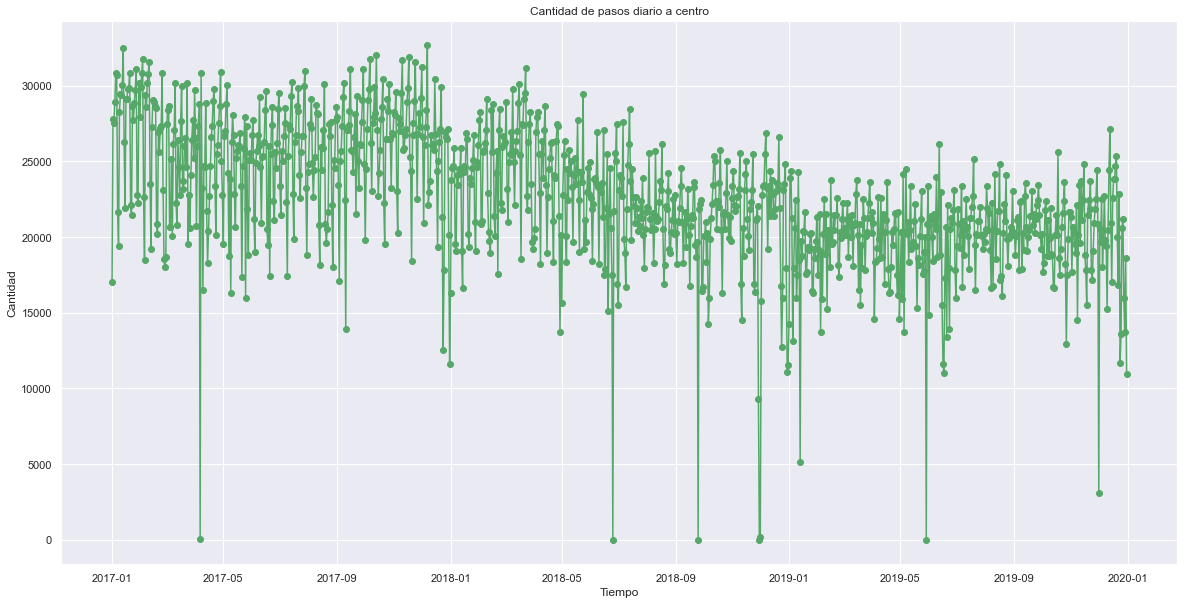

In [61]:
plt.figure(figsize = (20,10))
plt.plot(re_centro.index, re_centro.cantidad_pasos, 'o-', color = 'g')

plt.title('Cantidad de pasos diario a centro')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.show()

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


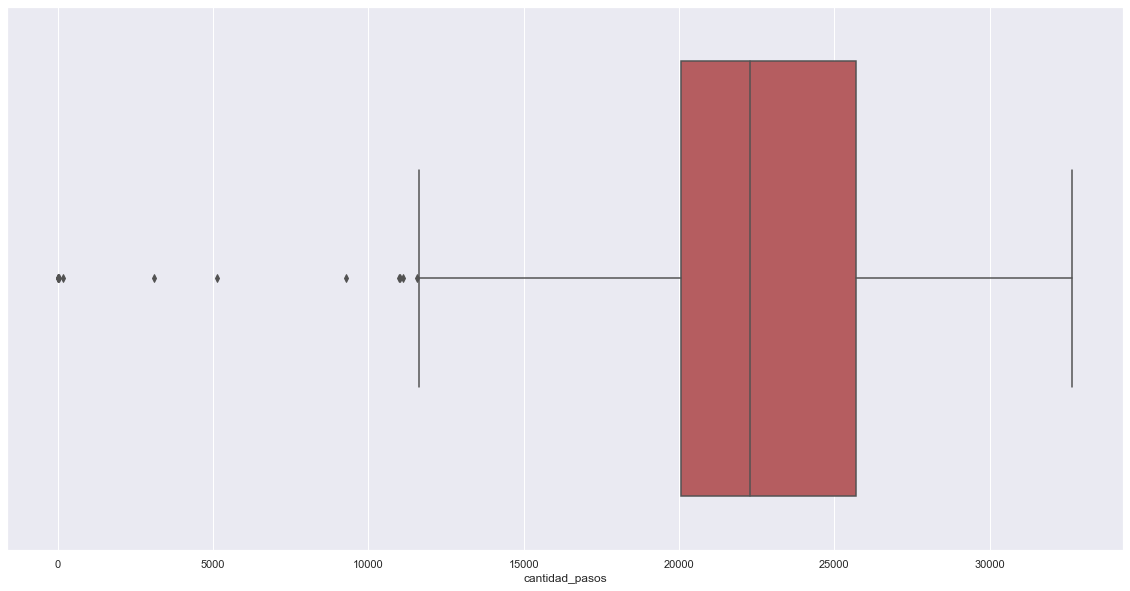

In [62]:
plt.figure(figsize = (20,10))
sns.boxplot(re_centro.cantidad_pasos, color = 'r')
plt.show()

In [63]:
## rango intercuartilico para sacar e interpolar los outliers ## 
    
Q1 = re_centro.cantidad_pasos.quantile(0.25)
Q3 = re_centro.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1

re_centro[(re_centro.cantidad_pasos < (Q1 - 1.5*IQR)) | (re_centro.cantidad_pasos > (Q3 + 1.5*IQR))] = np.nan
re_centro = re_centro.interpolate()


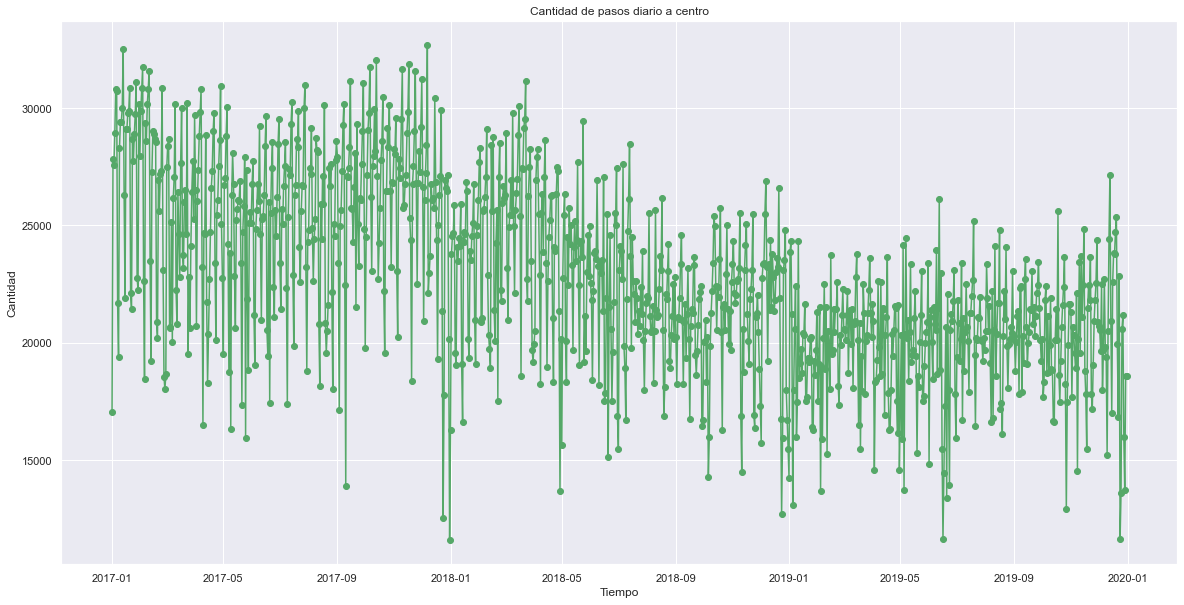

In [64]:
plt.figure(figsize = (20,10))
plt.plot(re_centro.index, re_centro.cantidad_pasos, 'o-', color = 'g')

plt.title('Cantidad de pasos diario a centro')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.show()

In [65]:
# hacemos ventana semanal 
ventana = int(365*2/7)
promedio_sem_cen = re_centro.cantidad_pasos.rolling(window=ventana, center = True).mean()
promedio_sem_cen


fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

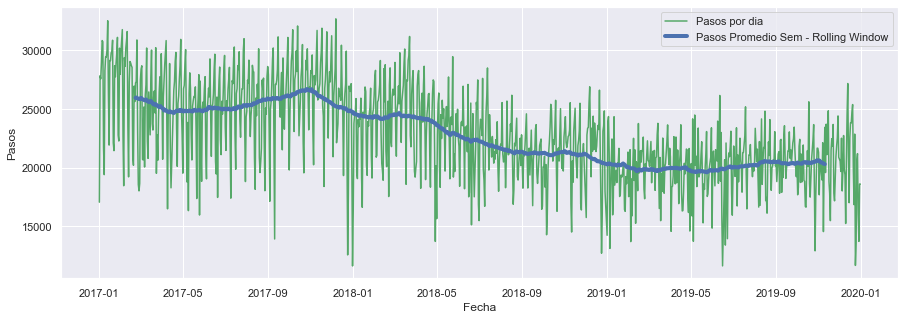

In [66]:
plt.figure(figsize = (15,5))
plt.plot(re_centro.index, re_centro.cantidad_pasos, label = 'Pasos por dia', color = 'g')
plt.plot(re_centro.index, promedio_sem_cen, lw = 4, label = 'Pasos Promedio Sem - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.legend()
plt.show()

### BENCHMARK Regresion Lineal

In [67]:
re_centro['fecha_numeros']=re_centro.index.map(datetime.datetime.toordinal)
re_centro.head()

dia  cantidad_pasos       año    mes    hora  fecha_numeros
fecha                                                                    
2017-01-01  127.0         17051.0  256159.0  127.0  1620.0         736330
2017-01-02  374.0         27825.0  377179.0  187.0  2216.0         736331
2017-01-03  537.0         27567.0  361043.0  179.0  2082.0         736332
2017-01-04  764.0         28949.0  385247.0  191.0  2308.0         736333
2017-01-05  970.0         30820.0  391298.0  194.0  2304.0         736334

In [68]:
lr = LinearRegression()
lr.fit(re_centro.fecha_numeros.values.reshape(-1,1), re_centro.cantidad_pasos)

LinearRegression()

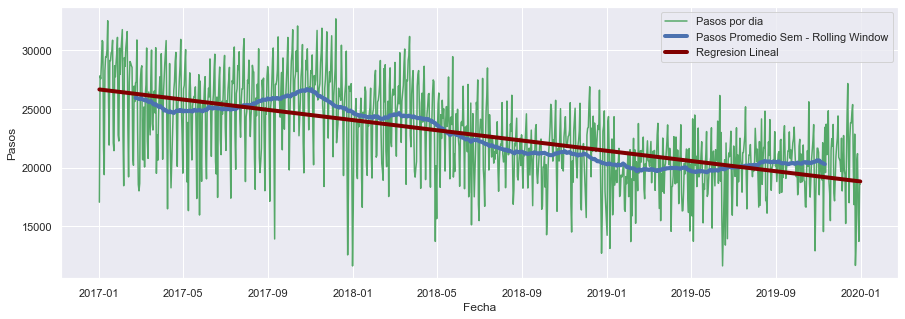

In [69]:
plt.figure(figsize = (15,5))
plt.plot(re_centro.index, re_centro.cantidad_pasos, label = 'Pasos por dia', color = 'g')
plt.plot(re_centro.index, promedio_sem_cen, lw = 4, label = 'Pasos Promedio Sem - Rolling Window')
plt.plot(re_centro.index, lr.predict(re_centro.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Regresion Lineal', color = 'maroon')

plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.legend()
plt.show()

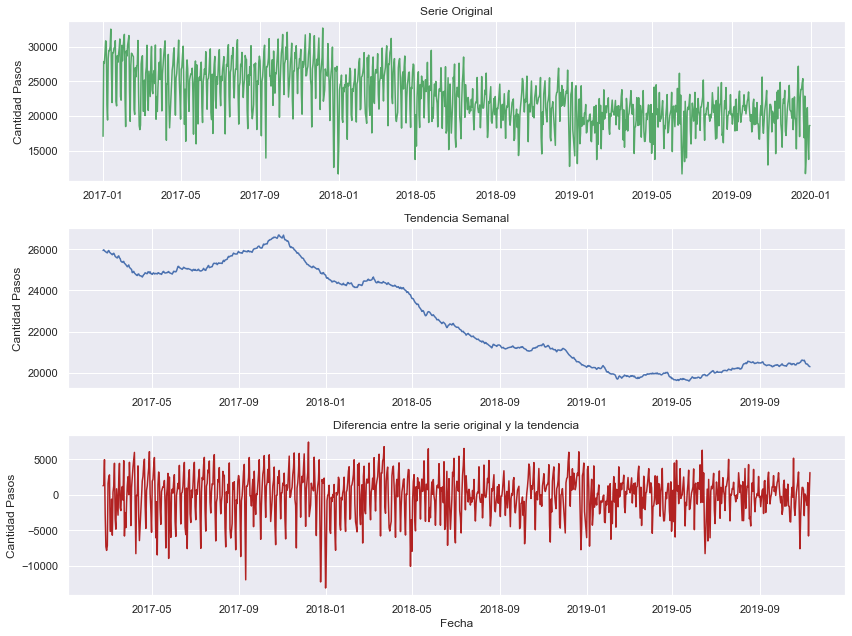

In [70]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(re_centro.index, re_centro.cantidad_pasos, color = 'g')
plt.ylabel('Cantidad Pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Semanal')
plt.plot(re_centro.index, promedio_sem_cen, color = 'b')
plt.ylabel('Cantidad Pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(re_centro.index, re_centro.cantidad_pasos - promedio_sem_cen, color = 'firebrick')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Pasos')

plt.tight_layout()
plt.show()

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultados_centro = seasonal_decompose(re_centro.cantidad_pasos, model='additive', extrapolate_trend='freq')

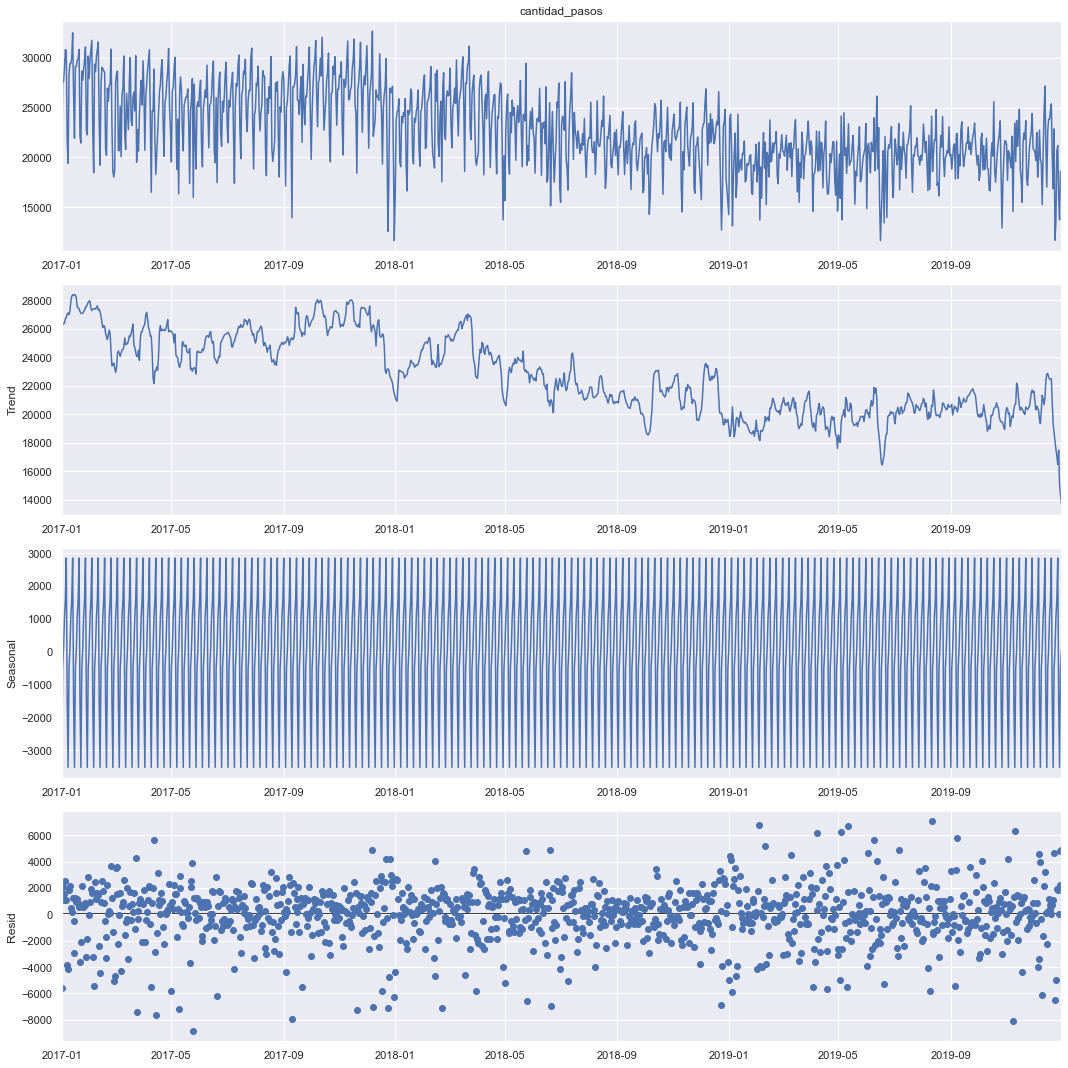

In [72]:
plt.rcParams['figure.figsize'] = [15,15]
resultados_centro.plot()
plt.show()

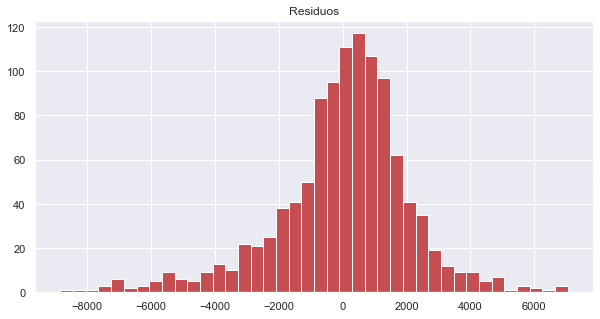

In [73]:
plt.figure(figsize = (10,5))
plt.hist(resultados_centro.resid, bins = 40, color = 'r')
plt.title('Residuos')
plt.show()

### Autocorrelacion

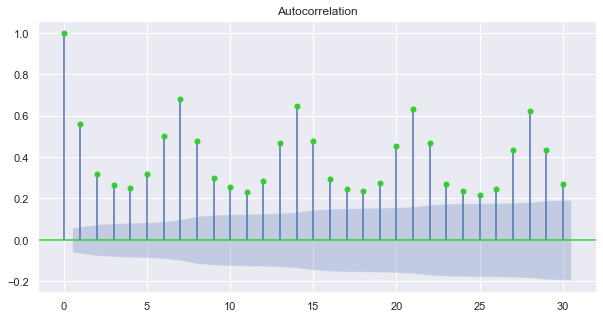

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['figure.figsize'] = [10,5]
plot_acf(re_centro.cantidad_pasos, lags = 30, color = 'limegreen')
plt.show()

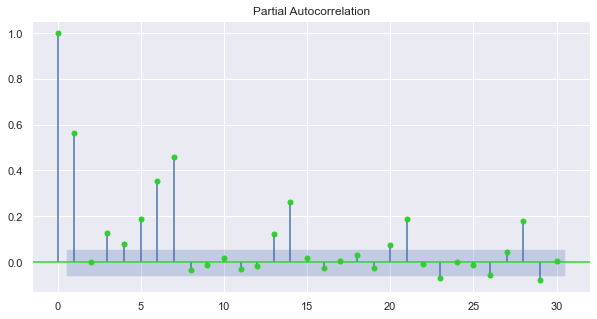

In [75]:
plot_pacf(re_centro.cantidad_pasos, lags = 30, color = 'limegreen')
plt.show()

### ONE-STEP Prediction

In [76]:
senial_cen = re_centro.cantidad_pasos
print(re_centro.shape, senial_cen.shape)
senial_cen.head()

(1095, 6) (1095,)


fecha
2017-01-01    17051.0
2017-01-02    27825.0
2017-01-03    27567.0
2017-01-04    28949.0
2017-01-05    30820.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [77]:
look_back = 250
N_cen = senial_cen.shape[0]
X_cen = np.zeros((N_cen - look_back - 1,look_back))
y_cen = np.zeros(N_cen - look_back - 1)
print(X_cen.shape, y_cen.shape)

(844, 250) (844,)


In [78]:
for i in range(X_cen.shape[0]):
    X_cen[i,:] = senial_cen.iloc[i:i+look_back]
    y_cen[i] = senial_cen.iloc[i+look_back]

In [79]:
N_train_cen = 750 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test_cen = 90 #cantidad de puntos que vamos a usar para evaluar
length_total_cen = N_train_cen + N_test_cen + look_back

X_train_cen = X_cen[:N_train_cen,:]
y_train_cen = y_cen[:N_train_cen]
print('Instancias de entrenamiento: ', X_train_cen.shape, y_train_cen.shape)

X_test_cen = X_cen[N_train_cen:N_train_cen+N_test_cen,:]
y_test_cen = y_cen[N_train_cen:N_train_cen+N_test_cen]
print('Instancias de prueba: ', X_test_cen.shape, y_test_cen.shape)

Instancias de entrenamiento:  (500, 250) (500,)
Instancias de prueba:  (90, 250) (90,)


##### Entrenamos el RandomForest y optimizamos los hiperparametros

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth': [3,9,13,15],
         'n_estimators' : [100, 75, 50],
        'max_features': ['auto', 'sqrt', 'log2']}

rf_cen = RandomizedSearchCV(RandomForestRegressor(), params, random_state=42, cv = 4 ,n_jobs = -1).fit(X_train_cen,y_train_cen)

In [81]:
print("Mejores parametros del modelo random forest: ", rf_cen.best_params_)
print("Mejor Score: ", rf_cen.best_score_.round(3))

Mejores parametros del modelo random forest:  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 13}
Mejor Score:  0.32


#### Predecimos y Testeamos

In [82]:
y_pred_cen = rf_cen.predict(X_cen)
y_train_pred_cen = rf_cen.predict(X_train_cen)
y_test_pred_cen = rf_cen.predict(X_test_cen)

MSE_cen = mean_squared_error(y_test_cen, y_test_pred_cen)
print('Error en Test:',np.sqrt(MSE_cen))

Error en Test: 2190.6427412879975


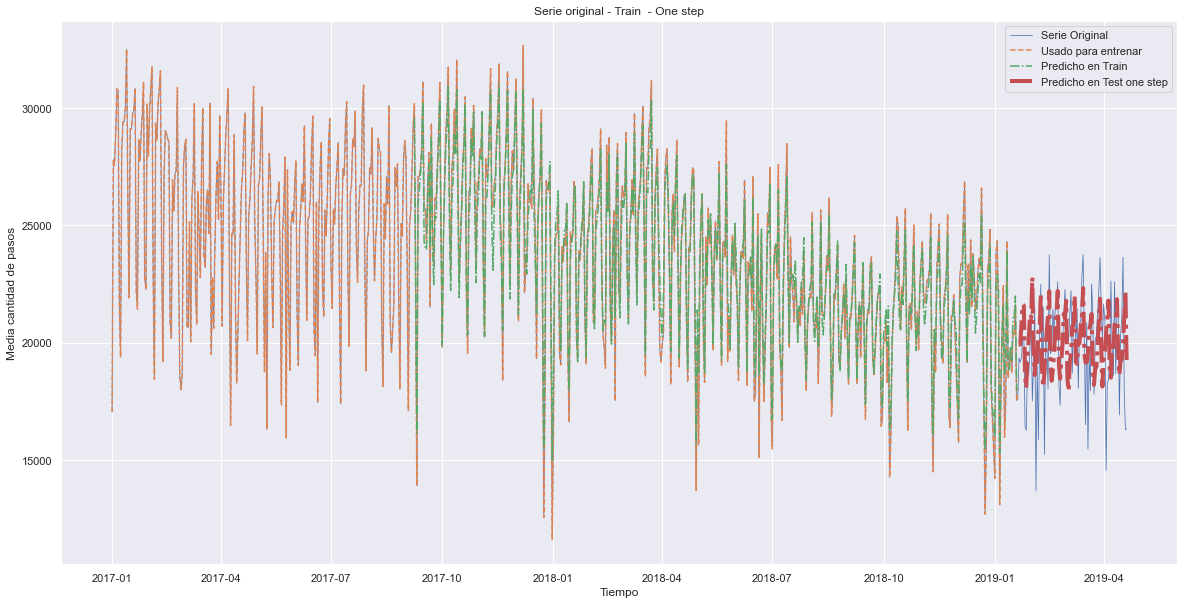

In [83]:
plt.figure(figsize=(20,10))
plt.plot(senial_cen.index[:length_total_cen], senial_cen[:length_total_cen],lw = 0.75, label = 'Serie Original')
plt.plot(senial_cen.index[:N_train_cen + look_back], senial_cen[:N_train_cen + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial_cen.index[look_back: look_back + N_train_cen], y_train_pred_cen,'-.',label = 'Predicho en Train')
plt.plot(senial_cen.index[N_train_cen+look_back: length_total_cen], y_test_pred_cen,'-.', lw = 4, label = 'Predicho en Test one step')
plt.legend()

plt.title('Serie original - Train  - One step')
plt.xlabel('Tiempo')
plt.ylabel('Media cantidad de pasos')
plt.show()

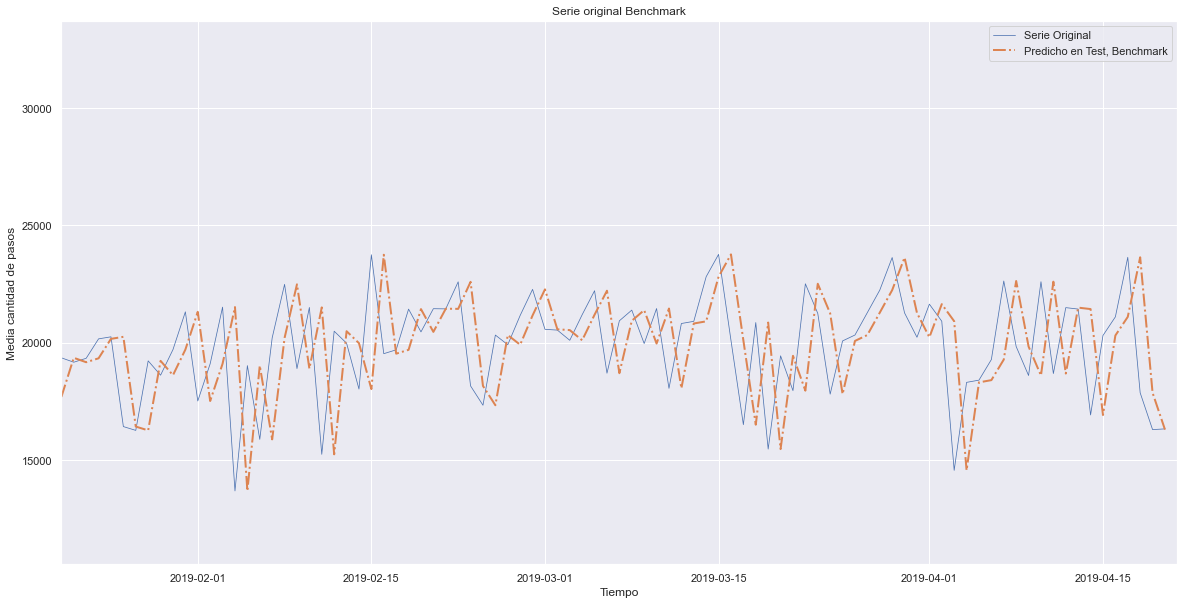

In [84]:
#BENCHMARK
y_test_pred_benchmark_cen = y_cen[-1 + N_train_cen:N_train_cen+N_test_cen - 1]

plt.figure(figsize=(20,10))
plt.plot(senial_cen.index[:length_total_cen], senial_cen[:length_total_cen],lw = 0.75, label = 'Serie Original')
plt.plot(senial_cen.index[N_train_cen+look_back: length_total_cen], y_test_pred_benchmark_cen,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial_cen.index[N_train_cen+look_back], senial_cen.index[length_total_cen])

plt.title('Serie original Benchmark')
plt.xlabel('Tiempo')
plt.ylabel('Media cantidad de pasos')
plt.legend()
plt.show()

### Multi-Step Prediction

In [85]:
X_test_cen[0,:]
y_ms_test_pred_cen = []
x = X_test_cen[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test_cen.size):
    y_os_pred_cen = rf_cen.predict(x.reshape(1,-1))
    y_ms_test_pred_cen.append(y_os_pred_cen)
    x = np.append(x[1:], y_os_pred_cen)
y_ms_test_pred_cen = np.array(y_ms_test_pred_cen)

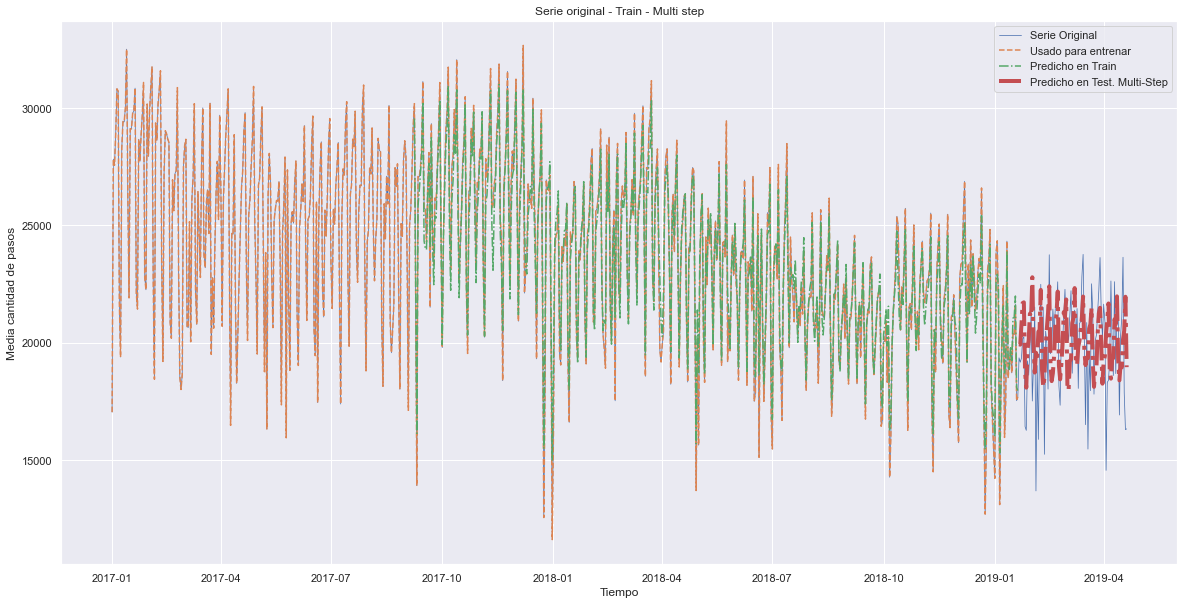

In [86]:

plt.figure(figsize=(20,10))
plt.plot(senial_cen.index[:length_total_cen], senial_cen[:length_total_cen],lw = 0.75, label = 'Serie Original')
plt.plot(senial_cen.index[:N_train_cen + look_back], senial_cen[:N_train_cen + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial_cen.index[look_back: look_back + N_train_cen], y_train_pred_cen,'-.',label = 'Predicho en Train')
plt.plot(senial_cen.index[N_train_cen+look_back: length_total_cen], y_ms_test_pred_cen,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()

plt.title('Serie original - Train - Multi step')
plt.xlabel('Tiempo')
plt.ylabel('Media cantidad de pasos')
plt.show()

In [87]:
MSE_cen_ms = mean_squared_error(y_test_cen, y_ms_test_pred_cen)
print('Error en Test:',np.sqrt(MSE_cen_ms))

Error en Test: 2165.013374413381


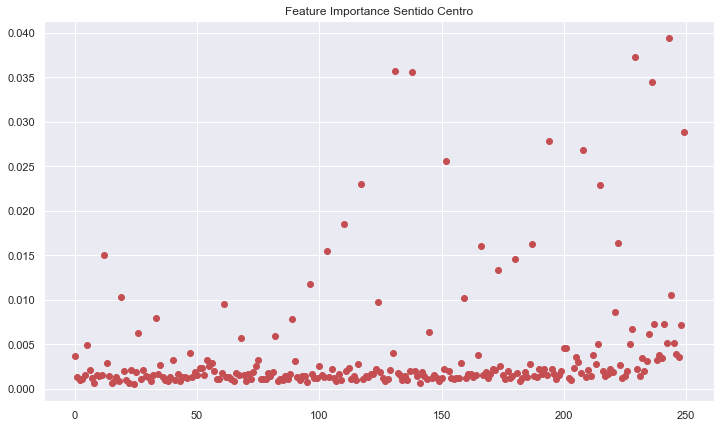

In [88]:
plt.figure(figsize = (12,7))
plt.title('Feature Importance Sentido Centro')
plt.scatter(np.arange(rf_cen.best_estimator_.feature_importances_.size),rf_cen.best_estimator_.feature_importances_, color = 'r')
plt.show()

## Conclusiones Parte B 

Como habiamos mencionado anteriormente, dividimos en dos el datset analizando e intentando predecir el flujo vehicular segun la direccion (sentido). En la elaboracion de los modelos, respondiendo a la segunda pregunta planteada en la parte A, podemos observar que es posible predecir el flujo segun el sentido ya que la cantidad de datos es apta para la elaboracion de un modelo robusto para ambos sentidos, por lo que si el dataset lo habriamos divivdo en tipo de vehiculo, el tipo "pesados" tendria pocos datos, por lo que estamos suponiendo que el tipo de vehiculo es parte del transito. En cambio el sentido del flujo es parejo. 

Respondiendo a la tercer pregunta, en los graficos de autocorrelacion podemos observar que hay una estacionalidad semanal en el grafico de ACF se nota una fuerte correlacion en ambos sentidos. Tambien lo corrobora la correlacion parcial, en el caso del PACF, se sobresalen los dias 7, 15, 21 y 28, afirmando calaramente esta estacionalidad semanal en el flujo Vehicular de estos tres años. 

En esta parte del proyecto primero hicimos una breve preprocesamiento de los datos, analizando la distribucion para cada sentido ,cantidad de datos, procesamiento de outliers e interpolacion. Luego yendo mas al analisis de los mismos, sacamos la media movil, encontramos una tendencia decreciente en ambos sentidos, tambien elaboramos un modelo benchmark de regresion para comparar con los otros modelos. 

Los modelos aplicados fueron, RandomForest Regressor para ONE-STEP y MULTI-STEP, finalmente comparando con el valor del dia anterior como benchmark.

El error para ambos modelos 2300 pasos aporximadamente para sentido Provincia, y 2190 pasos aproximadamente para sentido Centro. 

# Parte C

En esta Parte de invesigacion del proyecto me gustaria recalcar algunos aspectos de lo abordado, anteriormente y proponer mejoras. 
En ambos sentidos se nota una tendencia decreciente, pero pareciara que el sentido al centro tiene una pendiente levemente mayor en comparacion a provincia. 
Con respecto a los resultados del proyecto, no fueron malos pero creo que se seria interesante implementar otros como por ejemplo SARIMA para poder mejorar el RMSE de la prediccion, lo cual se podria investigar e implementar en el proyecto 4. 

Otros aspectos a mejorar: 

- Añadir distintos metodos de pago, hoy en dia creo que hay un fuerte incentivo para usar el telepase, y hay una gran cantidad de informacion alli que nos podria ayudar a tener mejores resultados, y corroborar de una manera feaciente la tendencia del flujo ya que abarcariamos todos los medios de pago. 

- Añadir años anteriores, puede permitir una analisis mas profunto y darle robustez a los modelos, le estariamos dando mas informacion que podria ser util en los entrenamientos del modelo. 

- Por ultimo se podria investigar sobre los outliers y con ello buscar las fechas que son de alto o bajo transito, y hacer que el modelo tenga en cuenta. Puede ser tambien ciertos eventos, como recitales, Partidos u otros que requiera de un movimiento inusual de las masas, en ambos sentidos. 